In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import multivariate_normal, permutation

import matplotlib.pyplot as plt

%matplotlib inline

# データの用意[MLE-01-4]

In [20]:
np.random.seed(20160512)

n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
# dfだと並んでるのでシャッフル
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [10]:
train_set.head()

,x1,x2,t
0,20.729880,18.209359,1
1,16.503919,14.685085,0
2,5.508661,17.426775,0
3,9.167047,9.178837,0
4,8.640423,9.561952,0


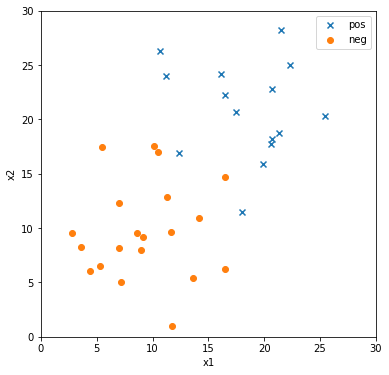

In [19]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

plt.figure(figsize=(6,6))

plt.ylim([0,30])
plt.xlim([0,30])
plt.scatter(train_set1.x1, train_set1.x2, marker='x', label='pos')
plt.scatter(train_set0.x1, train_set0.x2, marker='o', label='neg')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

ここまではほとんど本文と一緒

# modelの設計 [MLE-5-7]

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [24]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, kernel_initializer='zeros'))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Chapter2_0_model.png', show_shapes=True)

※マークダウンで表示してます。
<img src='Chapter2_0_model.png'>

# 学習 [MLE-8,9]

In [26]:
# verbose : epochの進捗。今回は可視化しない。
# fitの戻り値にLoss funcが含まれるため回収。
history = model.fit(train_x, train_t, verbose=0, epochs=20000)

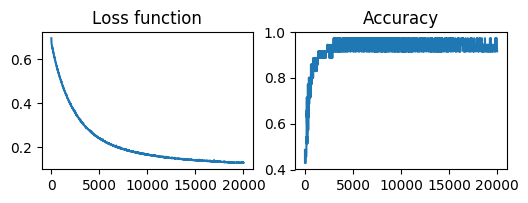

In [29]:
# subplotの書き方は個人的にこっちの方が好き。
# ただの解像度の設定。
plt.figure(dpi=100)

plt.subplot(221)
plt.plot(history.history['loss'])
plt.title('Loss function')

plt.subplot(222)
plt.plot(history.history['acc'])
plt.title('Accuracy')

# パラメーターの値の取り出し [MLE-10]

In [36]:
model.get_weights()

[array([[ 0.36455086],
        [ 0.33923531]], dtype=float32), array([-10.46599483], dtype=float32)]

In [38]:
# 本とは順序が逆になることに注意。
w1_val = model.get_weights()[0][0]
w2_val = model.get_weights()[0][1]
w0_val = model.get_weights()[1]

# 結果のプロット（predict）[MLE-11]

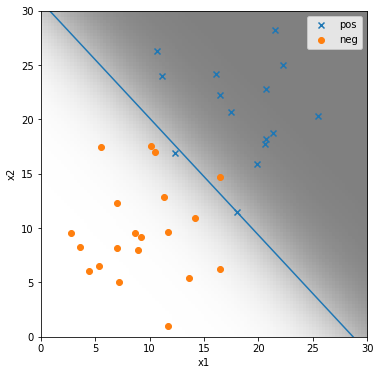

In [72]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

plt.figure(figsize=(6,6))

plt.ylim([0,30])
plt.xlim([0,30])
plt.scatter(train_set1.x1, train_set1.x2, marker='x', label='pos')
plt.scatter(train_set0.x1, train_set0.x2, marker='o', label='neg')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
plt.plot(linex, liney)

# ここはまどろっこしい処理だが、imshowしたいためだけなので深い追いしなくてもよい。
# ただ、
mesh = np.meshgrid(np.linspace(0,30,100), np.linspace(0,30,100))
mesh = np.concatenate([mesh[0].reshape([10000,1]), mesh[1].reshape([10000,1])], axis=1)
field = model.predict(mesh).reshape([100,100])
plt.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap='gray_r', alpha=0.5)